In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3423.jpg', 'with_mask_1524.jpg', 'with_mask_2710.jpg', 'with_mask_1847.jpg', 'with_mask_722.jpg']
['with_mask_2096.jpg', 'with_mask_3665.jpg', 'with_mask_2221.jpg', 'with_mask_914.jpg', 'with_mask_3620.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2285.jpg', 'without_mask_1349.jpg', 'without_mask_2734.jpg', 'without_mask_1008.jpg', 'without_mask_1524.jpg']
['without_mask_1643.jpg', 'without_mask_3639.jpg', 'without_mask_2744.jpg', 'without_mask_1329.jpg', 'without_mask_3194.jpg']


In [ ]:
print('the nummber of with mask images', len(with_mask_files))
print('the nummber of without mask images', len(without_mask_files))

the nummber of with mask images 3725
the nummber of without mask images 3828


#creating labels for the two classes

In [ ]:
#create the labels
with_mask_file = [1]*3725
without_mask_file = [0]*3828

In [ ]:
 print(with_mask_file[0:5])
print(without_mask_file[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_file + without_mask_file
print(len(labels))
print(labels[0:20])
print(labels[-20:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#Displaying the **images**

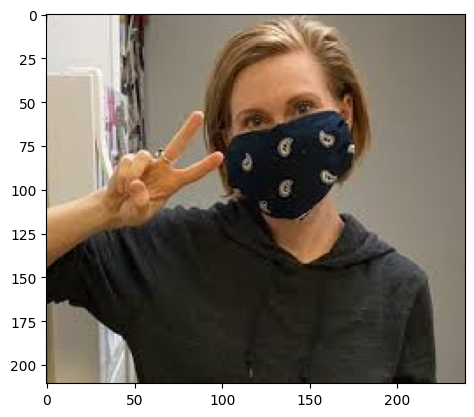

In [ ]:

img = mpimg.imread('/content/data/with_mask/with_mask_2867.jpg')
imgplot =plt.imshow(img)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

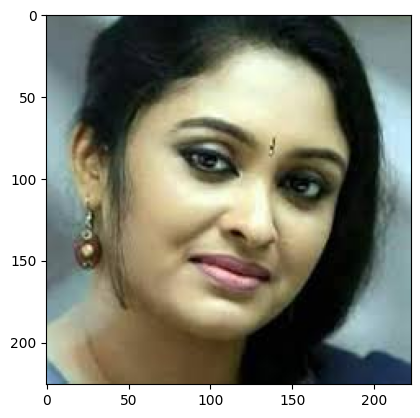

In [ ]:
img2 = mpimg.imread('/content/data/without_mask/without_mask_1942.jpg')
imgplot = plt.imshow(img2)
plt.show

#image **processing**

In [ ]:
#1.resize the images
#2.convert these images to numpy array


#with mask
with_mask_path = '/content/data/with_mask/'

data=[]
for img_files in with_mask_files:
  image = Image.open(with_mask_path + img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

#without mask
without_mask_path = '/content/data/without_mask/'


for img_files in without_mask_files:
  image = Image.open(without_mask_path + img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[165, 157, 147],
        [101,  86,  75],
        [125, 102,  89],
        ...,
        [171, 173, 159],
        [183, 184, 173],
        [183, 184, 178]],

       [[155, 147, 137],
        [ 96,  82,  70],
        [125, 103,  89],
        ...,
        [172, 174, 160],
        [182, 184, 173],
        [184, 185, 179]],

       [[150, 143, 132],
        [ 96,  81,  70],
        [126, 103,  90],
        ...,
        [176, 178, 164],
        [182, 184, 173],
        [184, 185, 179]],

       ...,

       [[158,  22,  50],
        [173,  13,  49],
        [191,   1,  46],
        ...,
        [142, 126, 115],
        [146, 130, 119],
        [127, 110, 102]],

       [[192,   2,  44],
        [193,   0,  43],
        [197,   0,  44],
        ...,
        [145, 128, 118],
        [147, 130, 119],
        [128, 110, 103]],

       [[192,   0,  40],
        [191,   0,  40],
        [191,   2,  43],
        ...,
        [145, 128, 118],
        [145, 128, 118],
        [131, 114, 107]]

In [ ]:
#converting image list and labels to numpy array

x = np.array(data)
y = np.array(labels)

#Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape,x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[5]

array([[[0.64705882, 0.54901961, 0.42745098],
        [0.64705882, 0.54901961, 0.42745098],
        [0.64705882, 0.54901961, 0.42745098],
        ...,
        [0.28235294, 0.23529412, 0.2627451 ],
        [0.28235294, 0.23921569, 0.25882353],
        [0.28627451, 0.23921569, 0.25882353]],

       [[0.65490196, 0.55686275, 0.43137255],
        [0.65490196, 0.55686275, 0.43137255],
        [0.65490196, 0.55686275, 0.43529412],
        ...,
        [0.30196078, 0.25098039, 0.28235294],
        [0.27843137, 0.23137255, 0.25882353],
        [0.28627451, 0.23529412, 0.2627451 ]],

       [[0.6627451 , 0.56862745, 0.43921569],
        [0.6627451 , 0.56862745, 0.43921569],
        [0.6627451 , 0.56470588, 0.44313725],
        ...,
        [0.33333333, 0.27843137, 0.31372549],
        [0.28235294, 0.22745098, 0.25882353],
        [0.26666667, 0.21176471, 0.23921569]],

       ...,

       [[0.78039216, 0.76470588, 0.75294118],
        [0.78039216, 0.76470588, 0.75686275],
        [0.78039216, 0

#building CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes =2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation ='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(62, kernel_size=(3,3), activation ='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [ ]:
#compile the nn
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:

#training
history =model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 24ms/step - loss: 0.4948 - acc: 0.7806 - val_loss: 0.3141 - val_acc: 0.8760
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3122 - acc: 0.8771 - val_loss: 0.2256 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 4s 22ms/step - loss: 0.2532 - acc: 0.9001 - val_loss: 0.2803 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2189 - acc: 0.9134 - val_loss: 0.1955 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1742 - acc: 0.9331 - val_loss: 0.2181 - val_acc: 0.9074


#Model evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy is =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2238 - acc: 0.9140
Test Accuracy is = 0.9139642715454102


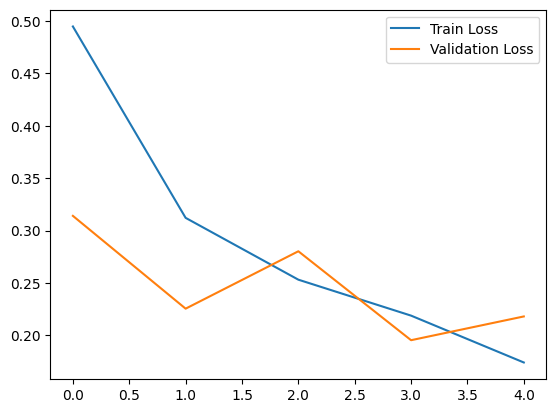

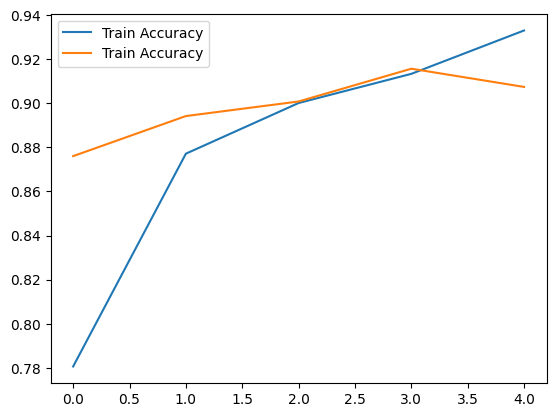

In [ ]:
h = history
#plot the loss value
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#Plot the accuracy value
plt.plot(h.history['acc'], label='Train Accuracy')
plt.plot(h.history['val_acc'], label='Train Accuracy')
plt.legend()
plt.show()

#predictive system

Path of the image to be predicted: /content/test.jpg


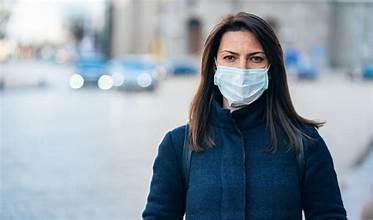

1/1 [==============================] - 0s 242ms/step
[[0.3639892 0.7699946]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label ==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')